<a href="https://colab.research.google.com/github/Daksh-Dhaker/Neural-Networks/blob/main/MNISTDATAset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
from tensorflow.keras.datasets import mnist

In [26]:
(X_train,y_train),(X_test,y_test) = mnist.load_data() # It loads the mnist data set for us.

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
single_image = X_train[0]

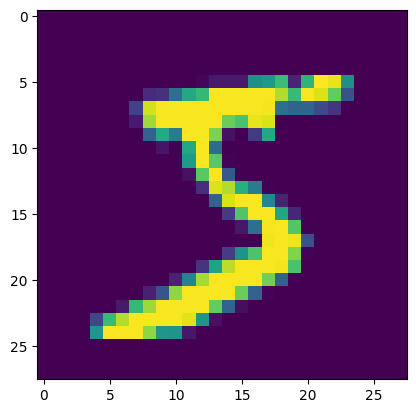

In [29]:
plt.imshow(single_image) # the image is colored because it maps this values(0-255) to color maps like viridis

In [30]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [31]:
#One-Hot encoding of y_train(labels)
from tensorflow.keras.utils import to_categorical

In [32]:
y_train_encoded = to_categorical(y_train)

In [33]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
y_cat_test = to_categorical(y_test,num_classes = 10)

In [35]:
y_cat_train = to_categorical(y_train,num_classes =10)

In [36]:
# Normalising the X_train and X_test (min=0,max=255)
X_test = X_test/255
X_train = X_train/255

In [39]:
#batch_size,width,height,color_channel
X_train = X_train.reshape(60000,28,28,1)

In [40]:
X_test = X_test.reshape(10000,28,28,1)

In [41]:
# building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [52]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (4,4),input_shape =(28,28,1),activation ='relu')) # also look for strides and padding
model.add(MaxPool2D(pool_size =(2,2))) # half of our kernel size
# Flatten means converting a matrix into linear array
model.add(Flatten())

model.add(Dense(128,activation ='relu')) # here number should be of the order of(28*28)

# Output Layer (Since it is a multi-class classification one neuron oer class)
model.add(Dense(10,activation ='softmax')) # 10 possible classes

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])






In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
early_stop = EarlyStopping(monitor ='val_loss',patience =1)

In [55]:
model.fit(X_train,y_cat_train,epochs =10,validation_data =(X_test,y_cat_test),callbacks = [early_stop])

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.1340 - accuracy: 0.9601 - val_loss: 0.0515 - val_accuracy: 0.9840
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0477 - accuracy: 0.9850 - val_loss: 0.0427 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0382 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0200 - accuracy: 0.9936 - val_loss: 0.0443 - val_accuracy: 0.9876


In [59]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

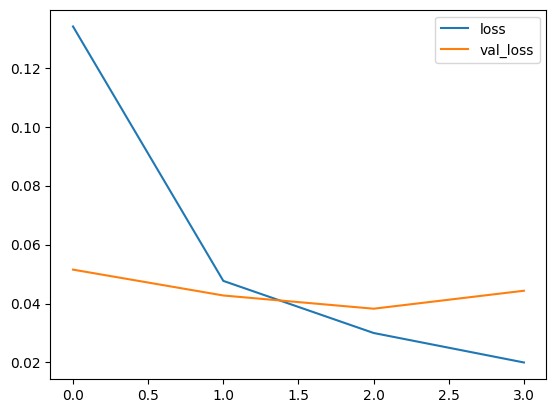

In [60]:
metrics[['loss','val_loss']].plot()

<Axes: >

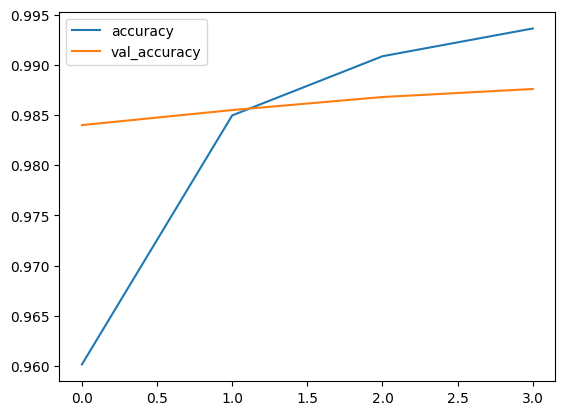

In [61]:
metrics[['accuracy','val_accuracy']].plot()

In [64]:
model.evaluate(X_test,y_cat_test,verbose =0)

[0.04434613883495331, 0.9876000285148621]

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
predictions = model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


In [70]:
import tensorflow as tf
prediction_classes = tf.argmax(predictions,axis =1)

In [80]:
predictions = model.predict(X_train[:1])

1/1 [==============================] - 0s 50ms/step


In [77]:
import tensorflow as tf
prediction_classes = tf.argmax(predictions,axis =1)

In [78]:
prediction_classes

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([5])>

In [81]:
predictions = model.predict(X_test)
import tensorflow as tf
prediction = tf.argmax(predictions,axis =1)

313/313 [==============================] - 2s 6ms/step


In [82]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       1.00      0.97      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [85]:
print(confusion_matrix(y_test,prediction))

[[ 973    1    0    1    1    0    3    0    1    0]
 [   1 1129    0    0    0    1    2    1    1    0]
 [   1    2 1022    0    1    0    1    4    1    0]
 [   0    0    4  983    0   17    0    1    1    4]
 [   0    0    0    0  979    0    0    0    0    3]
 [   2    0    0    3    0  886    1    0    0    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    2    7    0    1    1    0 1014    1    2]
 [   4    0    5    0    0    2    3    3  949    8]
 [   1    1    0    0    8    4    0    4    1  990]]


<Axes: >

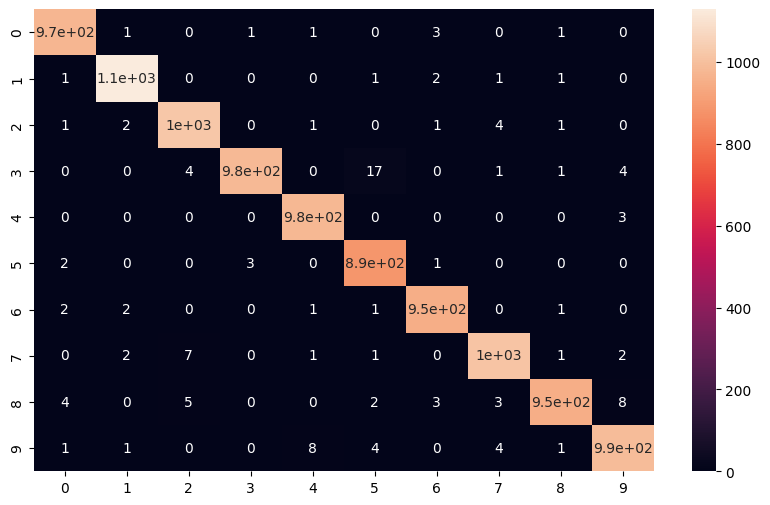

In [87]:
import seaborn as sns
plt.figure(figsize =(10,6))
sns.heatmap(confusion_matrix(y_test,prediction),annot = True)

In [88]:
my_number = X_test[0]

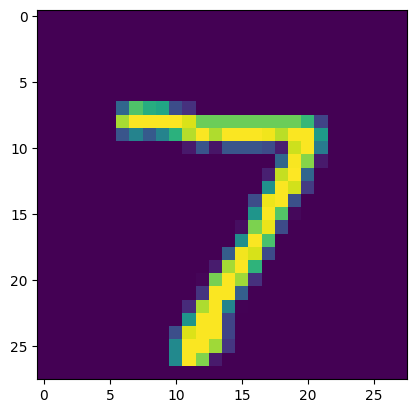

In [89]:
plt.imshow(my_number.reshape(28,28))

In [91]:
# num_images,width, height, color_channels
tf.argmax(model.predict(my_number.reshape(1,28,28,1)),axis =1)

1/1 [==============================] - 0s 34ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([7])>